In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [3]:

df1=pd.read_csv(r"C:\Users\Praveen\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\Praveen\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\Praveen\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\Praveen\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\Praveen\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
927460  2024-06      YISHUN     5 ROOM  502B      YISHUN ST 51     10 TO 12   
927461  2024-06      YISHUN     5 ROOM   865      YISHUN ST 81     07 TO 09   
927462  2024-06      YISHUN  EXECUTIVE   723      YISHUN ST 71     10 TO 12   
927463  2024-06      YISHUN  EXECUTIVE   826      YISHUN ST 81     10 TO 12   
927464  2024-06      YISHUN  EXECUTIVE   826      YISHUN ST 81     04 TO 06   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
927460           112.0        Improved                 2018      738000.0   
927461           122.0        Improved                 1988      680000.0   
927462           146.0      Maisonette                 1986      790000.0   
927463           146.0      Maisonette                 1988     1000000.0   
927464           146.0      Maisonette                 1988     1000000.0   

           remaining_lease  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
927460  92 years 08 months  
927461  62 years 10 months  
927462            61 years  
927463  62 years 08 months  
927464  62 years 08 months  

[927465 rows x 11 columns]

In [4]:
df.shape

(927465, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927465 non-null  object 
 1   town                 927465 non-null  object 
 2   flat_type            927465 non-null  object 
 3   block                927465 non-null  object 
 4   street_name          927465 non-null  object 
 5   storey_range         927465 non-null  object 
 6   floor_area_sqm       927465 non-null  float64
 7   flat_model           927465 non-null  object 
 8   lease_commence_date  927465 non-null  int64  
 9   resale_price         927465 non-null  float64
 10  remaining_lease      218415 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.8+ MB


In [6]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [7]:
df.describe().T

count           mean            std     min       25%  \
floor_area_sqm       927465.0      95.691236      25.824985    28.0      73.0   
lease_commence_date  927465.0    1988.278012      10.664813  1966.0    1981.0   
resale_price         927465.0  320848.058806  170522.857301  5000.0  193000.0   

                          50%       75%        max  
floor_area_sqm           93.0     113.0      307.0  
lease_commence_date    1986.0    1996.0     2020.0  
resale_price         297500.0  418000.0  1588000.0

In [8]:
df['resale_price'].value_counts()

resale_price
300000.0    6922
350000.0    6848
280000.0    6549
320000.0    6528
380000.0    6287
            ... 
170400.0       1
190328.0       1
308100.0       1
439100.0       1
689500.0       1
Name: count, Length: 9524, dtype: int64

In [9]:
#Data Cleaning
df.nunique()

month                   414
town                     27
flat_type                 8
block                  2711
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9524
remaining_lease         726
dtype: int64

In [10]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [11]:
#REMAINING_LEASE
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [12]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [13]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

month    town  flat_type block   street_name storey_range  \
927460  2024-06  YISHUN     5 ROOM  502B  YISHUN ST 51     10 TO 12   
927461  2024-06  YISHUN     5 ROOM   865  YISHUN ST 81     07 TO 09   
927462  2024-06  YISHUN  EXECUTIVE   723  YISHUN ST 71     10 TO 12   
927463  2024-06  YISHUN  EXECUTIVE   826  YISHUN ST 81     10 TO 12   
927464  2024-06  YISHUN  EXECUTIVE   826  YISHUN ST 81     04 TO 06   

        floor_area_sqm  flat_model  lease_commence_date  resale_price  \
927460           112.0    Improved                 2018      738000.0   
927461           122.0    Improved                 1988      680000.0   
927462           146.0  Maisonette                 1986      790000.0   
927463           146.0  Maisonette                 1988     1000000.0   
927464           146.0  Maisonette                 1988     1000000.0   

        remaining_lease  
927460        92.666667  
927461        62.833333  
927462        61.000000  
927463        62.666667  
927464        62.666667

In [14]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711643
95.000000      2376
67.000000      2212
69.000000      1914
71.000000      1763
              ...  
96.833333         1
97.250000         1
97.416667         1
97.583333         1
41.500000         1
Name: count, Length: 673, dtype: int64

In [15]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [16]:
#Wrong Formate
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [17]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

town flat_type block       street_name storey_range  floor_area_sqm  \
0  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12            31.0   
1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06            31.0   

  flat_model  lease_commence_date  resale_price  remaining_lease resale_year  \
0   IMPROVED                 1977        9000.0             68.0        1990   
1   IMPROVED                 1977        6000.0             68.0        1990   

  resale_month  
0           01  
1           01

In [18]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

town  flat_type block   street_name storey_range  floor_area_sqm  \
927463  YISHUN  EXECUTIVE   826  YISHUN ST 81     10 TO 12           146.0   
927464  YISHUN  EXECUTIVE   826  YISHUN ST 81     04 TO 06           146.0   

        flat_model  lease_commence_date  resale_price  remaining_lease  \
927463  Maisonette                 1988     1000000.0        62.666667   
927464  Maisonette                 1988     1000000.0        62.666667   

       resale_year resale_month  storey_lower_bound  storey_upper_bound  
927463        2024           06                  10                  12  
927464        2024           06                   4                   6

In [19]:
df.drop('storey_range', axis = 1, inplace= True)


In [20]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [21]:
df.head()

town flat_type  block       street_name  floor_area_sqm  \
0  ANG MO KIO    1 ROOM  309.0  ANG MO KIO AVE 1            31.0   
1  ANG MO KIO    1 ROOM  309.0  ANG MO KIO AVE 1            31.0   
2  ANG MO KIO    1 ROOM  309.0  ANG MO KIO AVE 1            31.0   
3  ANG MO KIO    1 ROOM  309.0  ANG MO KIO AVE 1            31.0   
4  ANG MO KIO    3 ROOM  216.0  ANG MO KIO AVE 1            73.0   

       flat_model  lease_commence_date  resale_price  remaining_lease  \
0        IMPROVED                 1977        9000.0             68.0   
1        IMPROVED                 1977        6000.0             68.0   
2        IMPROVED                 1977        8000.0             68.0   
3        IMPROVED                 1977        6000.0             68.0   
4  NEW GENERATION                 1976       47200.0             68.0   

   resale_year  resale_month  storey_lower_bound  storey_upper_bound  
0         1990             1                  10                  12  
1         1990             1                   4                   6  
2         1990             1                  10                  12  
3         1990             1                   7                   9  
4         1990             1                   4                   6

In [22]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [23]:
# TEXT ERRORS
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [24]:
df['town'].value_counts()

town
TAMPINES           80005
YISHUN             70097
JURONG WEST        66715
BEDOK              66677
WOODLANDS          65563
ANG MO KIO         52090
HOUGANG            50772
BUKIT BATOK        44429
CHOA CHU KANG      38348
BUKIT MERAH        34383
PASIR RIS          33237
SENGKANG           32488
TOA PAYOH          31541
QUEENSTOWN         28784
GEYLANG            28179
CLEMENTI           28040
BUKIT PANJANG      27708
KALLANG/WHAMPOA    27199
JURONG EAST        24796
SERANGOON          22835
BISHAN             21271
PUNGGOL            20665
SEMBAWANG          13869
MARINE PARADE       8041
CENTRAL AREA        7150
BUKIT TIMAH         2519
LIM CHU KANG          64
Name: count, dtype: int64

In [25]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352489
3 ROOM              296064
5 ROOM              195520
EXECUTIVE            69704
2 ROOM               11841
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [26]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [27]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352489
3 ROOM              296064
5 ROOM              195520
EXECUTIVE            69704
2 ROOM               11841
1 ROOM                1304
MULTI GENERATION       543
Name: count, dtype: int64

In [28]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17606
BEDOK RESERVOIR RD    14726
ANG MO KIO AVE 10     13810
ANG MO KIO AVE 3      12154
HOUGANG AVE 8          9367
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [29]:
df['flat_model'].value_counts()

flat_model
Model A                   194884
Improved                  168318
New Generation            110125
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46806
Simplified                 34302
Apartment                  25603
Standard                   25179
SIMPLIFIED                 23258
Maisonette                 17466
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10142
APARTMENT                   9901
DBSS                        3308
Adjoined flat               1250
Model A-Maisonette          1096
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      437
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      217
2-room                       117
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [30]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [31]:
df['flat_model'].value_counts()

flat_model
Model A                   265265
Improved                  241907
New Generation            189023
Simplified                 57560
Premium Apartment          46812
Standard                   42554
Apartment                  35504
Maisonette                 29681
Model A2                   10142
DBSS                        3308
Model A-Maisonette          2078
Adjoined flat               1250
Terrace                      694
Multi Generation             543
Type S1                      437
Type S2                      217
2-room                       138
Improved-Maisonette          126
Premium Apartment Loft       108
Premium Maisonette            86
3Gen                          32
Name: count, dtype: int64

In [32]:
#Duplicates
df.duplicated().sum()

2347

In [33]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [34]:
#Outliers
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [35]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

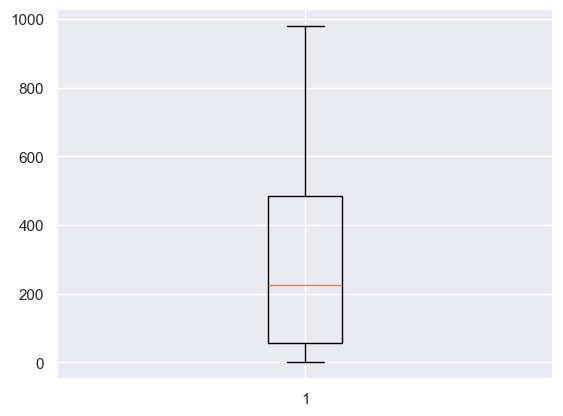

In [36]:
#Using Boxplot
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [37]:
# IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-586.0, 1126.0)

In [38]:
df.block = df.block.clip(lower_bound , upper_bound)

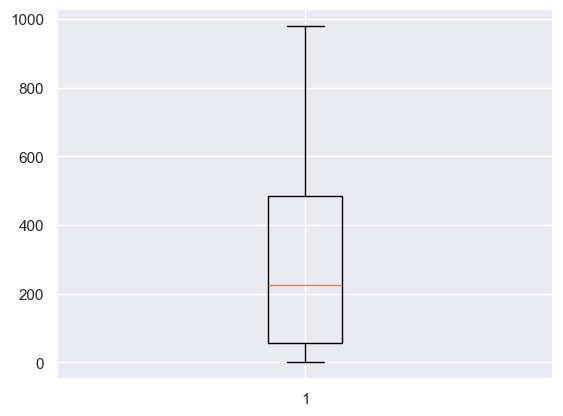

In [39]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

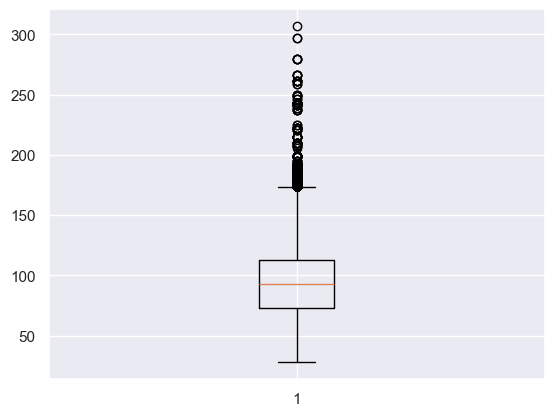

In [40]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [41]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [42]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

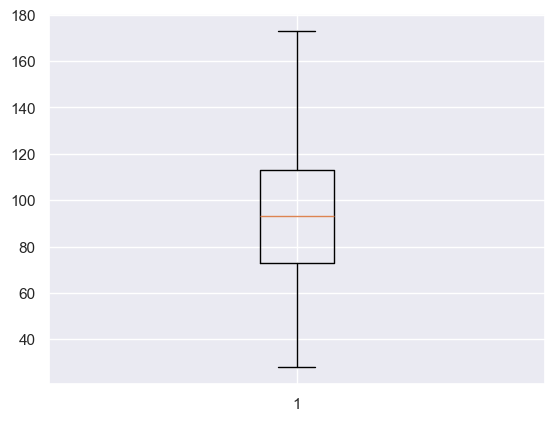

In [43]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

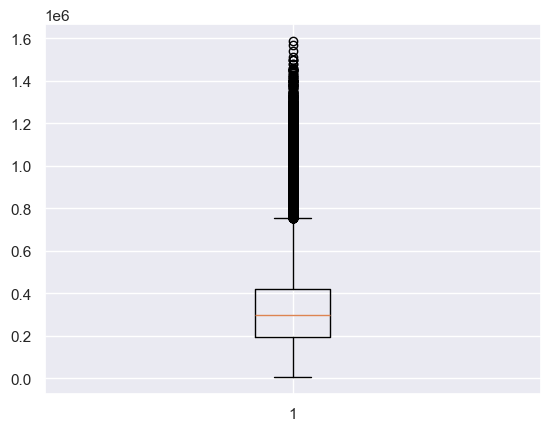

In [44]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [45]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-144500.0, 755500.0)

In [46]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

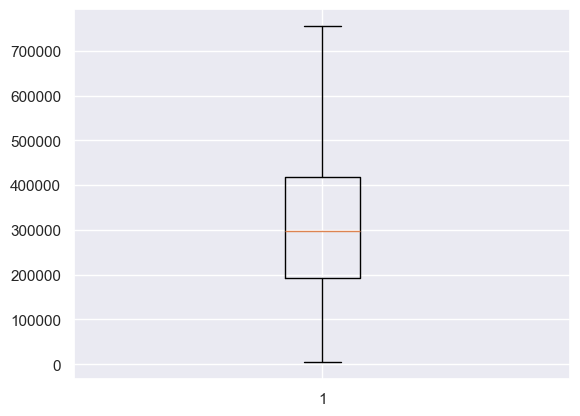

In [47]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

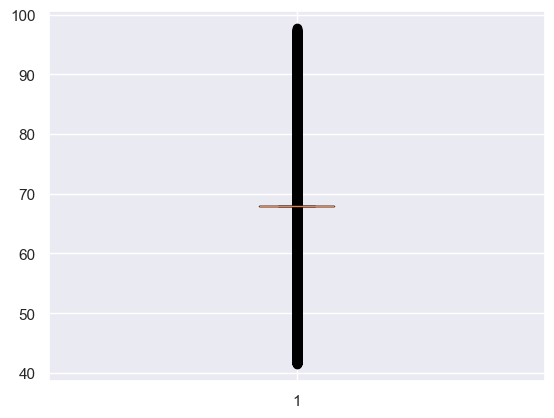

In [48]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [49]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [50]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

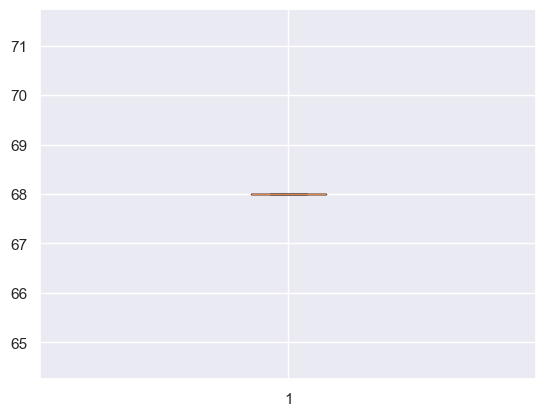

In [51]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

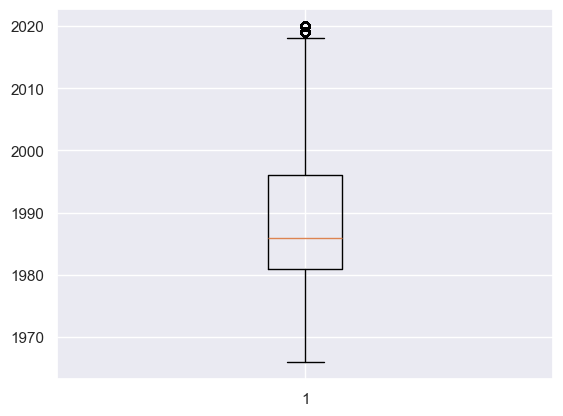

In [52]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [53]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [54]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

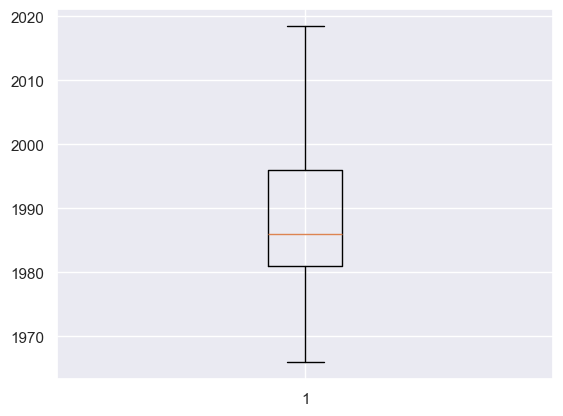

In [55]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

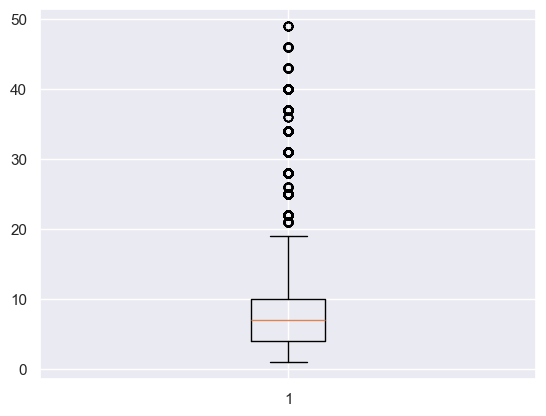

In [56]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [57]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [58]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

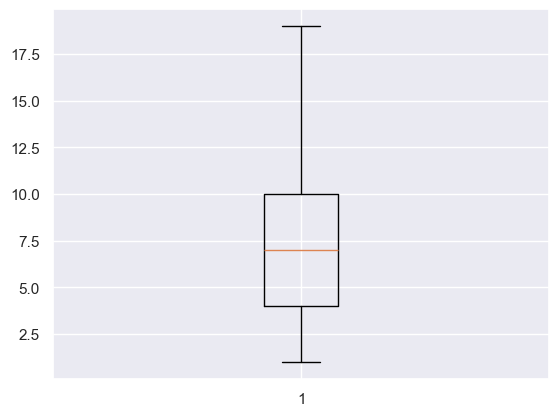

In [59]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

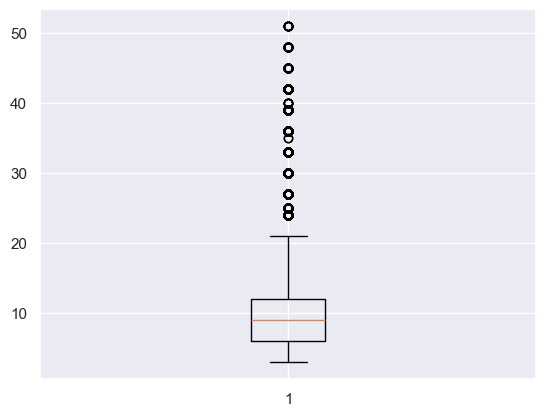

In [60]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [61]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [62]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

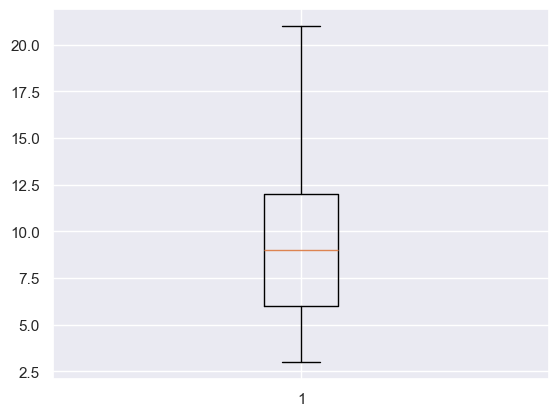

In [63]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [64]:
#EDA - EXPLORATARY DATA ANALYSIS
#Categorical Vs Frequency using BarPlot

In [65]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

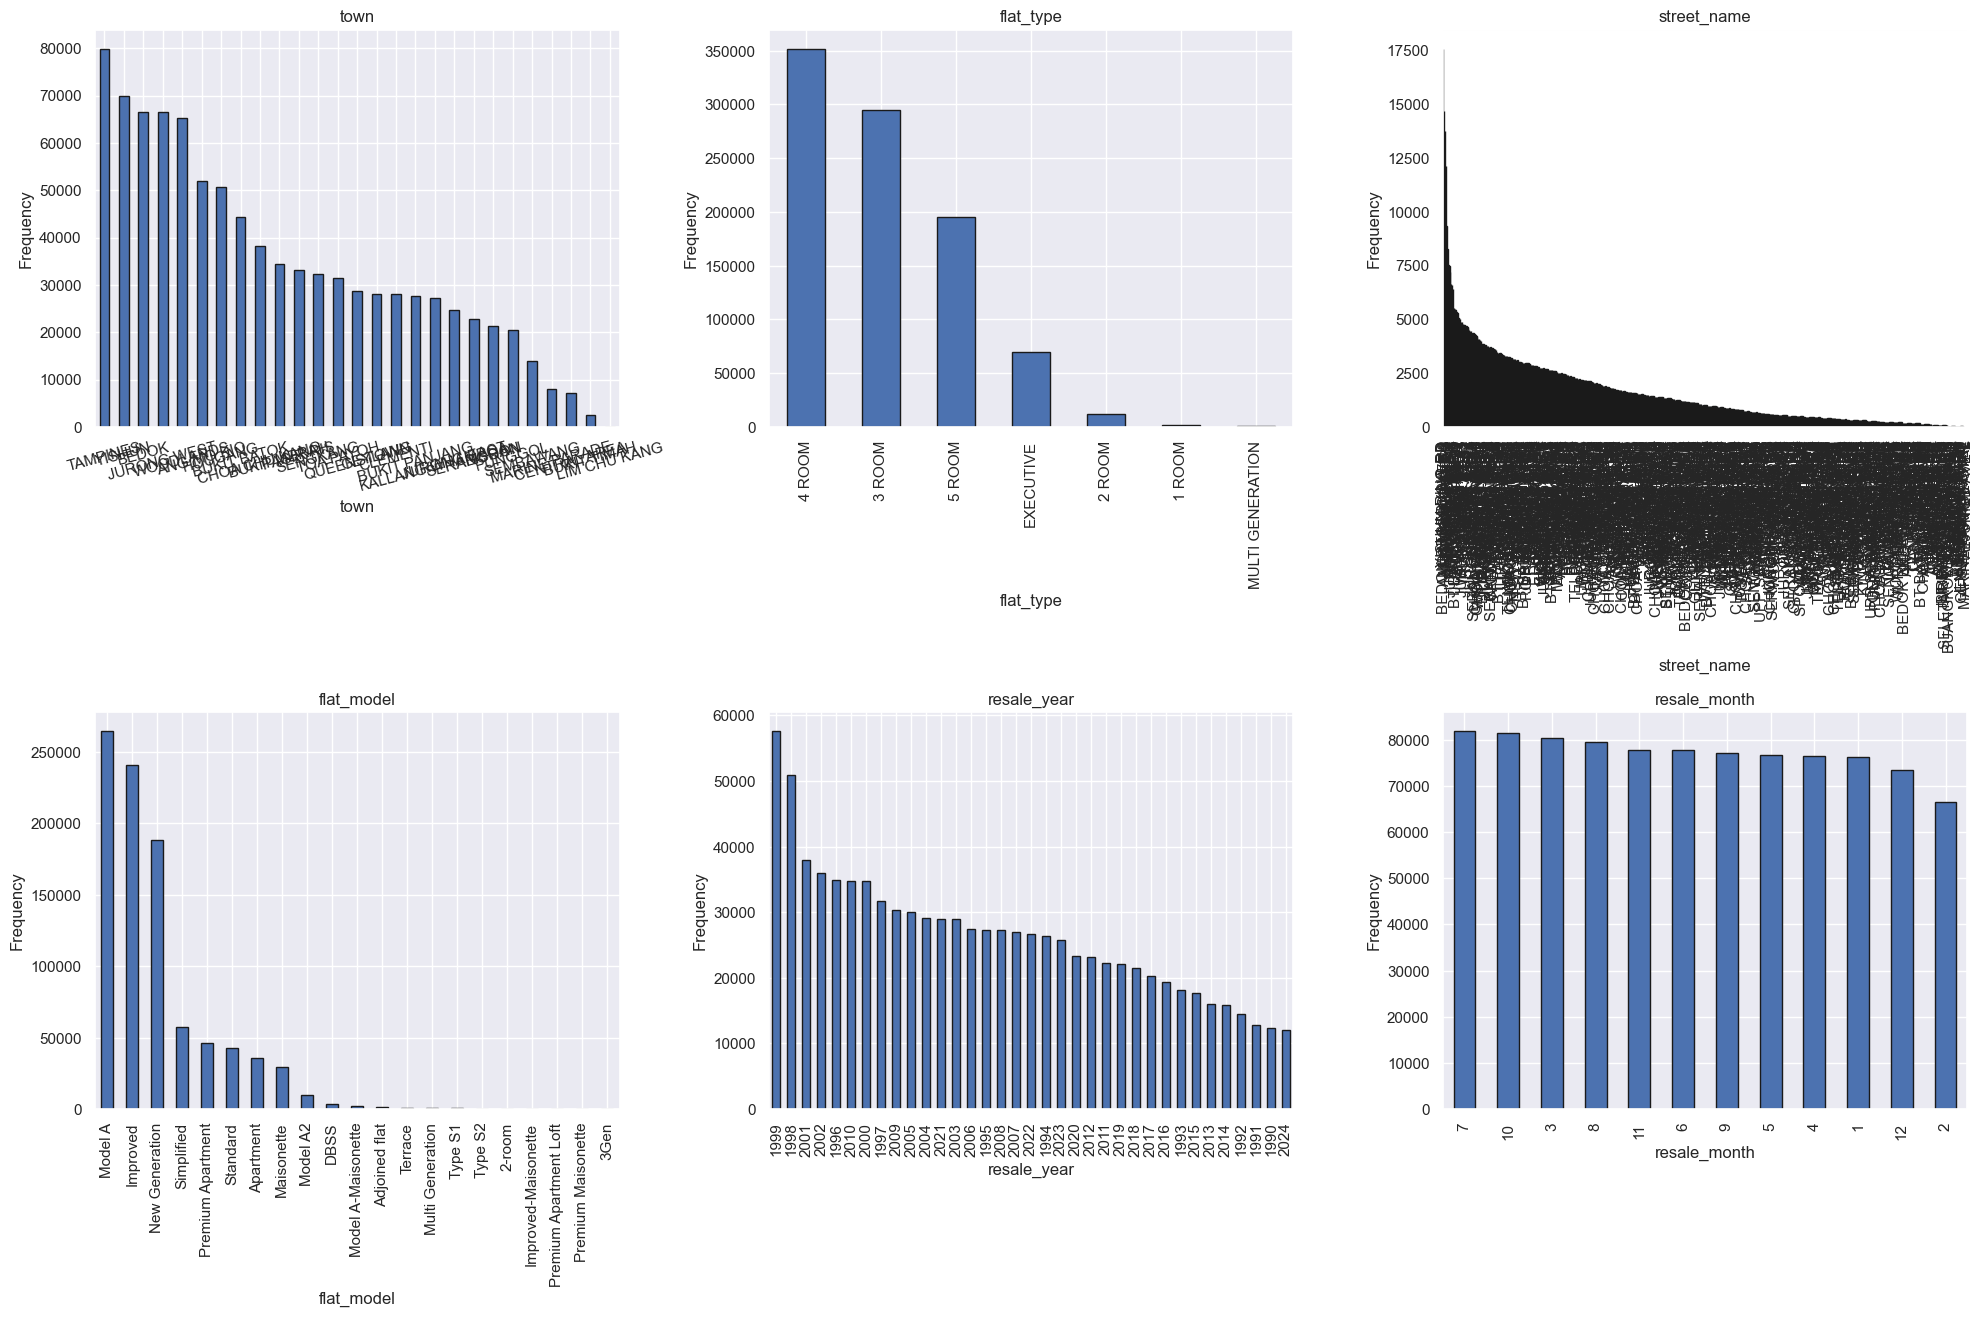

In [66]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [67]:
#Feature Vs Target (Categorical Data )


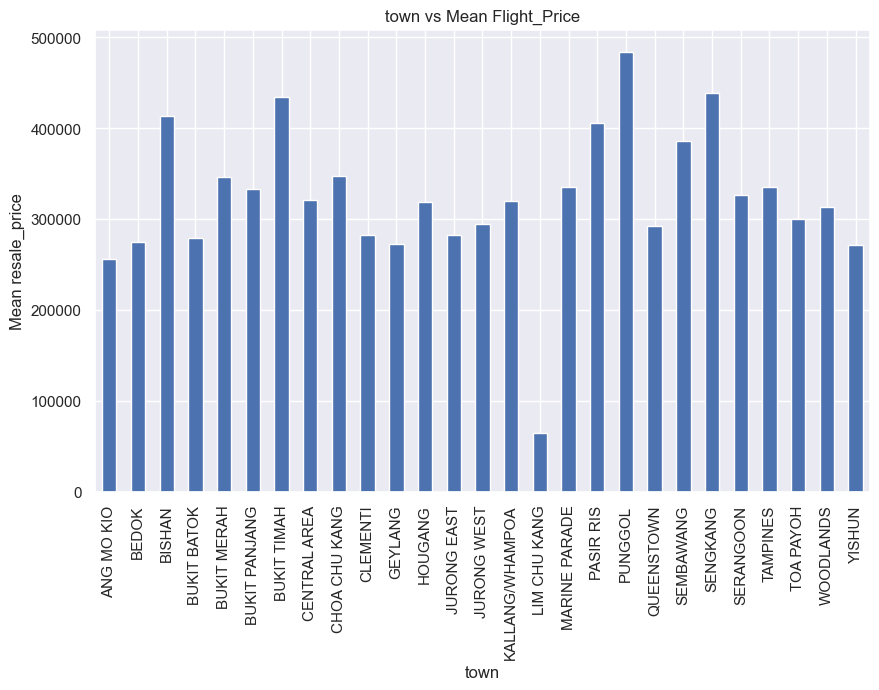

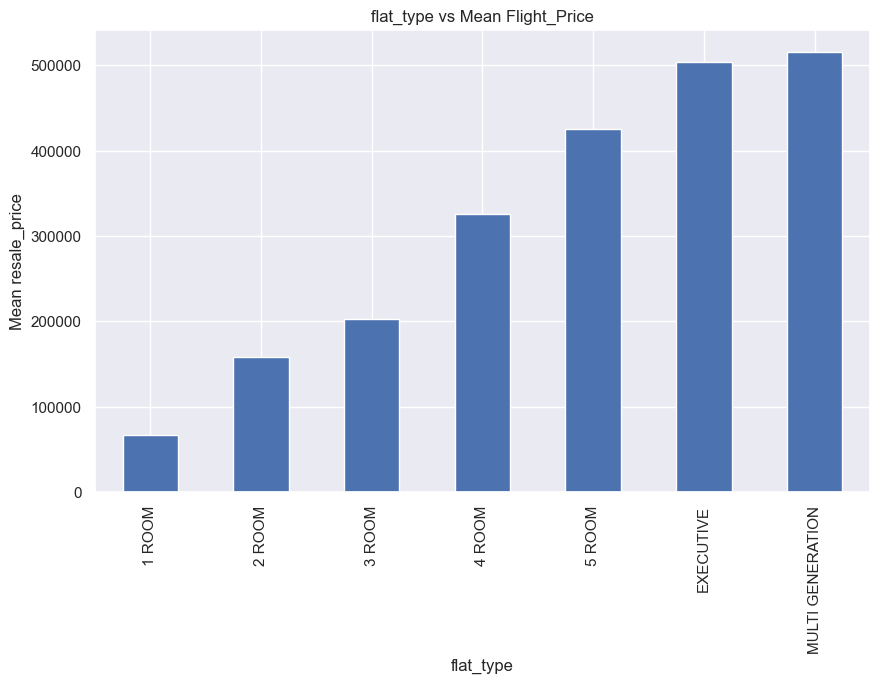

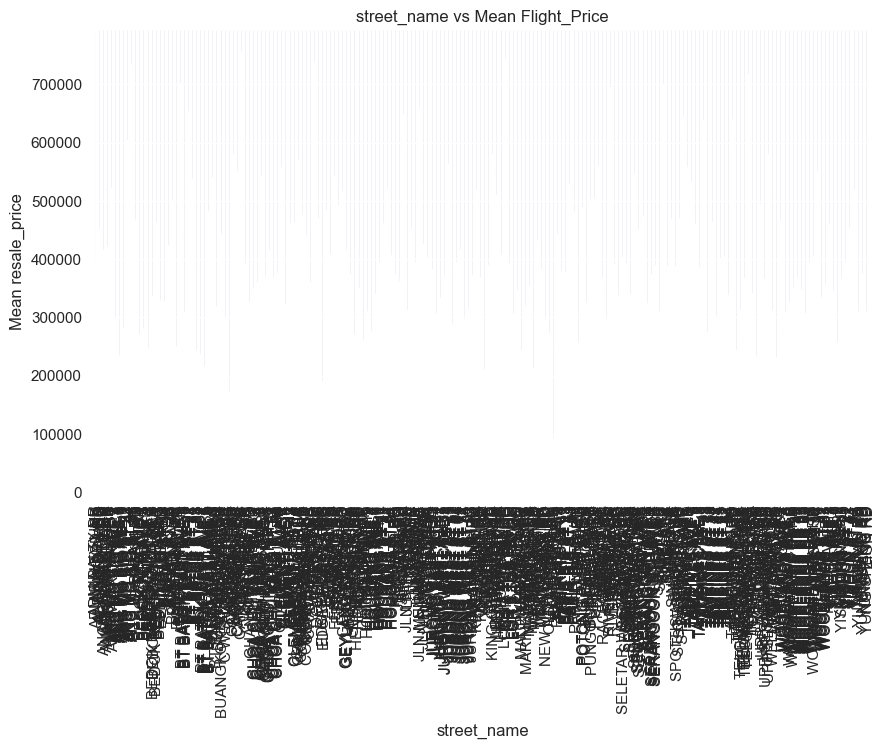

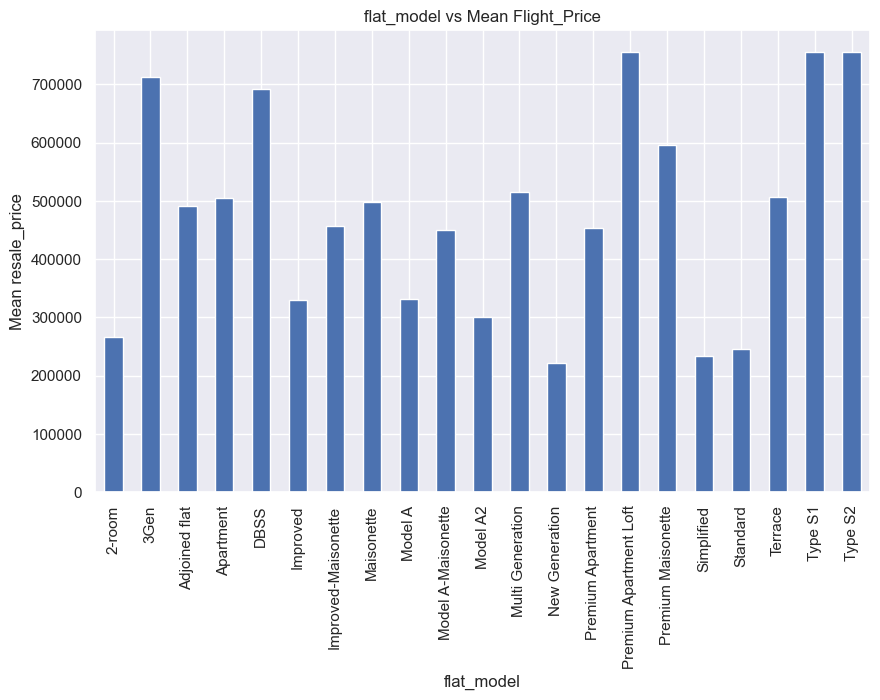

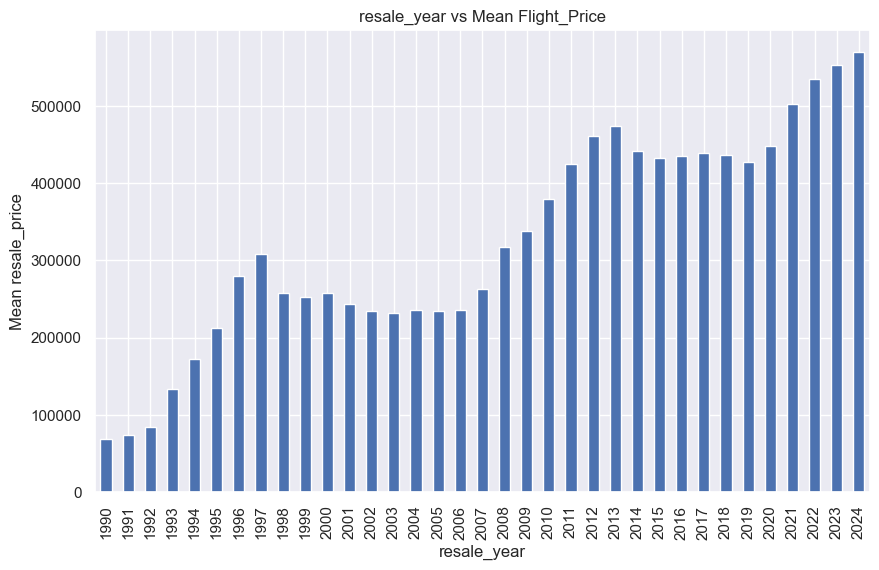

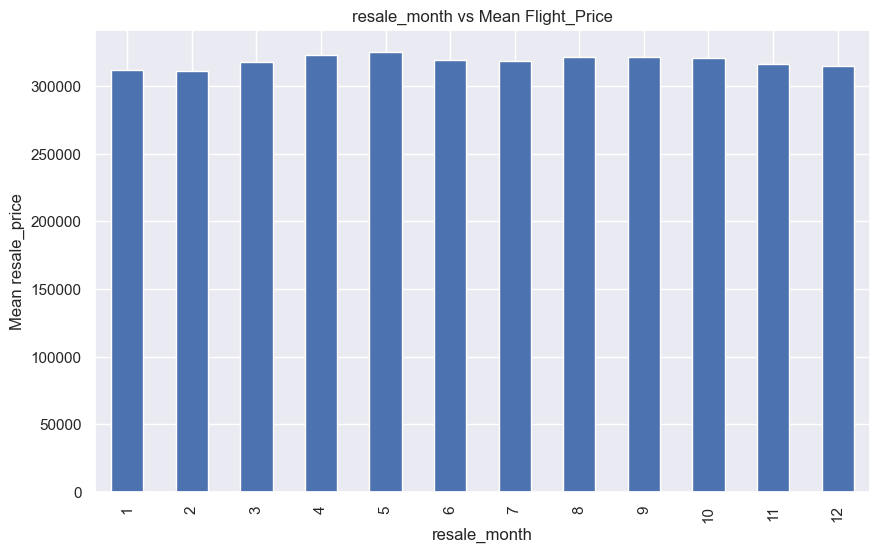

In [68]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

In [69]:
# Feature Vs Target (Condinues Data )

In [70]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [71]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

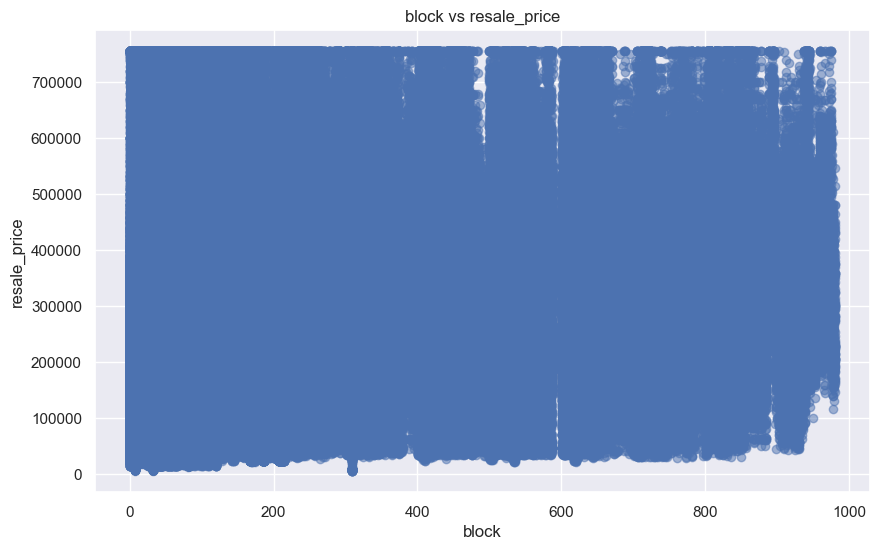

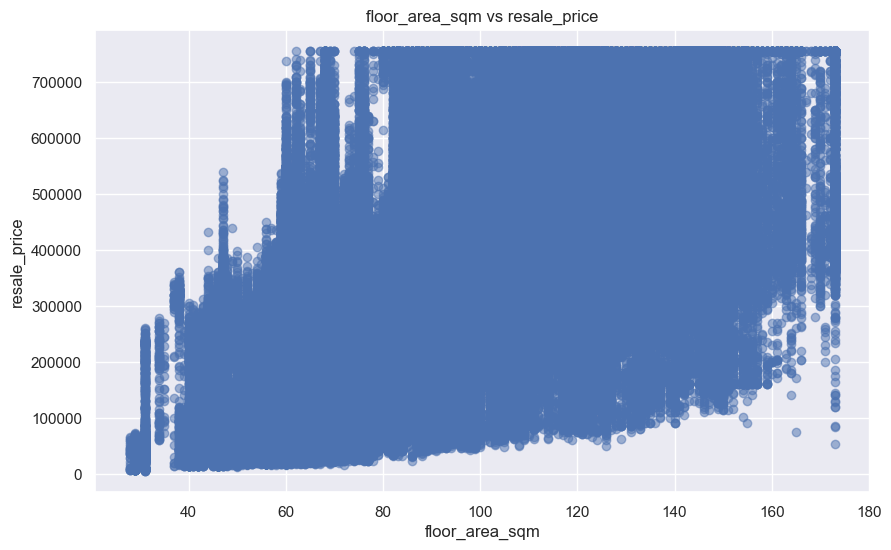

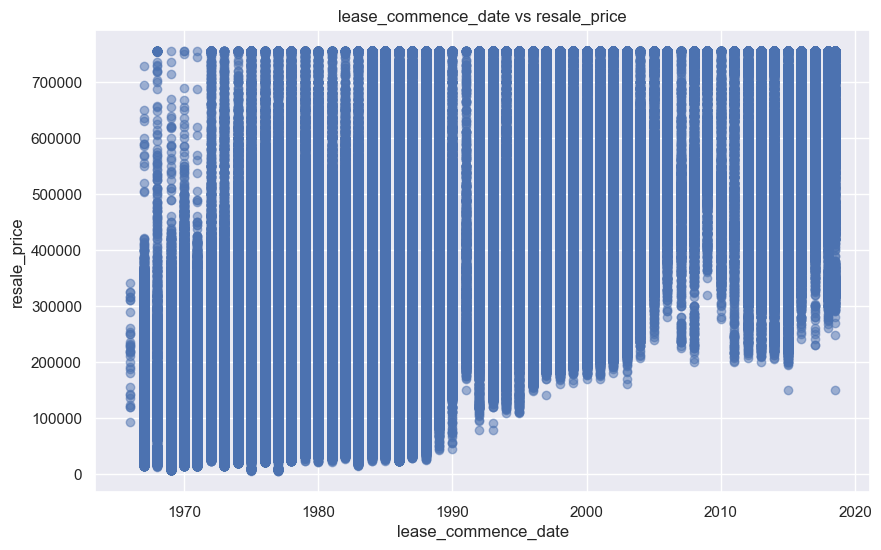

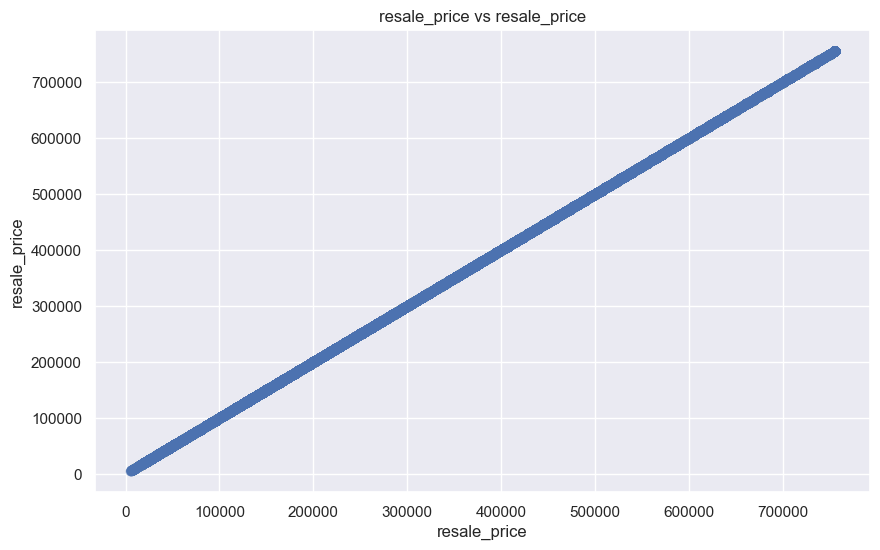

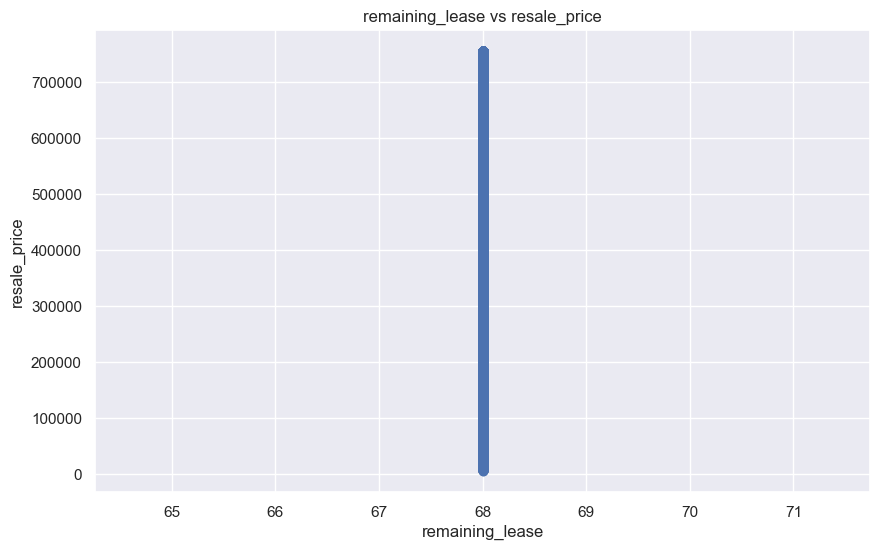

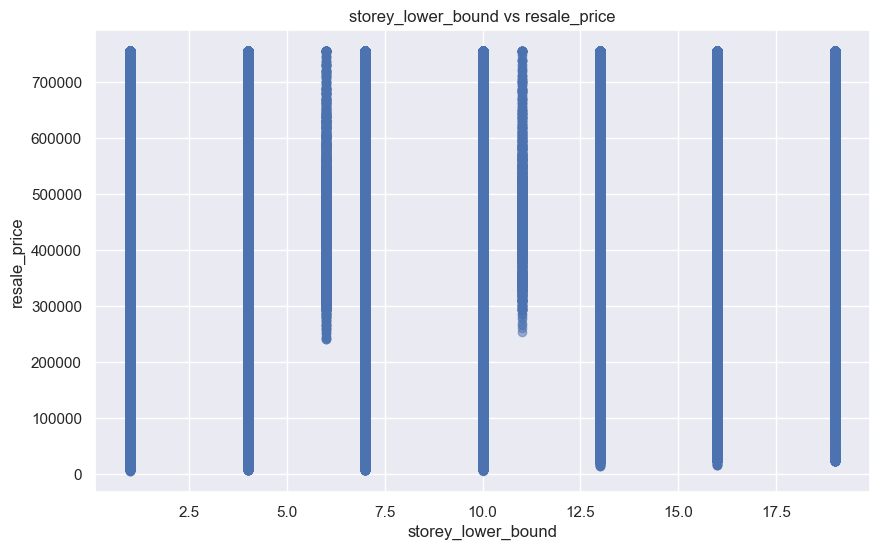

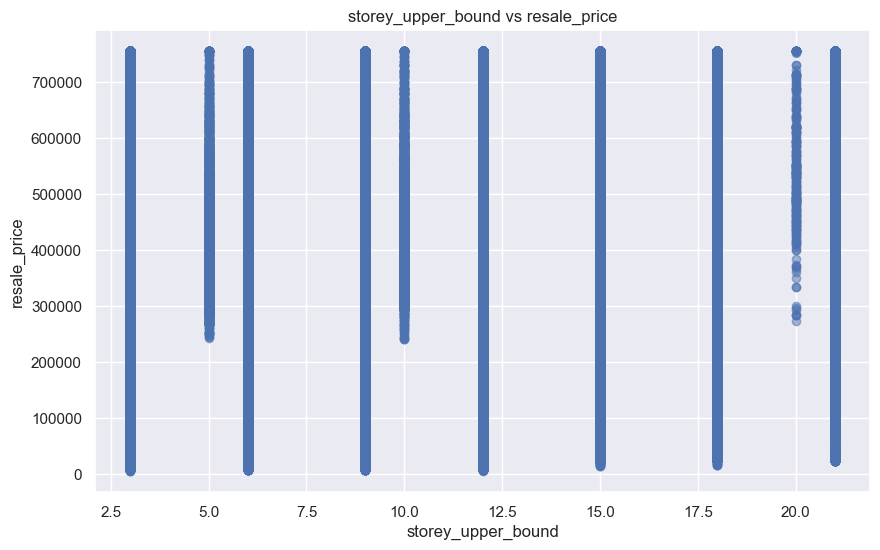

In [72]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [73]:
#Encoding Categorical Variables

In [74]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [75]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [76]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [77]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

town flat_type  block  street_name  floor_area_sqm flat_model  \
0  ANG MO KIO    1 ROOM  309.0            1            31.0   Improved   
1  ANG MO KIO    1 ROOM  309.0            1            31.0   Improved   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6

In [78]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [79]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

town  flat_type  block  street_name  floor_area_sqm flat_model  \
0  ANG MO KIO          1  309.0            1            31.0   Improved   
1  ANG MO KIO          1  309.0            1            31.0   Improved   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6

In [80]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

town  flat_type  block  street_name  floor_area_sqm  flat_model  \
0  ANG MO KIO          1  309.0            1            31.0          14   
1  ANG MO KIO          1  309.0            1            31.0          14   
2  ANG MO KIO          1  309.0            1            31.0          14   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   
2               1977.0        8000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6  
2             1                  10                  12

In [81]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

town  flat_type  block  street_name  floor_area_sqm  flat_model  \
0     1          1  309.0            1            31.0          14   
1     1          1  309.0            1            31.0          14   
2     1          1  309.0            1            31.0          14   
3     1          1  309.0            1            31.0          14   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   
2               1977.0        8000.0             68.0         1990   
3               1977.0        6000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6  
2             1                  10                  12  
3             1                   7                   9

In [82]:
# save the processed data for the deployment
df1.to_csv('final.csv')

In [83]:
#Correlation

In [84]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

town  flat_type     block  street_name  \
town                 1.000000   0.208387  0.050517     0.587220   
flat_type            0.208387   1.000000  0.127917     0.386965   
block                0.050517   0.127917  1.000000     0.047006   
street_name          0.587220   0.386965  0.047006     1.000000   
floor_area_sqm       0.201193   0.954848  0.187838     0.355890   
flat_model           0.163735   0.242530 -0.002803     0.354161   
lease_commence_date  0.333474   0.408922  0.004565     0.737993   
resale_price         0.123354   0.600377 -0.082518     0.379059   
remaining_lease           NaN        NaN       NaN          NaN   
resale_year          0.124159   0.101059 -0.116133     0.317464   
resale_month         0.003909   0.003395  0.002263     0.006160   
storey_lower_bound  -0.019126   0.077533 -0.124599     0.081552   
storey_upper_bound  -0.018862   0.077865 -0.124637     0.082192   

                     floor_area_sqm  flat_model  lease_commence_date  \
town                       0.201193    0.163735             0.333474   
flat_type                  0.954848    0.242530             0.408922   
block                      0.187838   -0.002803             0.004565   
street_name                0.355890    0.354161             0.737993   
floor_area_sqm             1.000000    0.200438             0.387048   
flat_model                 0.200438    1.000000             0.355840   
lease_commence_date        0.387048    0.355840             1.000000   
resale_price               0.574928    0.245926             0.543327   
remaining_lease                 NaN         NaN                  NaN   
resale_year                0.062822    0.162454             0.430684   
resale_month               0.002846    0.001544             0.003394   
storey_lower_bound         0.043790    0.019834             0.153483   
storey_upper_bound         0.043979    0.020193             0.153887   

                     resale_price  remaining_lease  resale_year  resale_month  \
town                     0.123354              NaN     0.124159      0.003909   
flat_type                0.600377              NaN     0.101059      0.003395   
block                   -0.082518              NaN    -0.116133      0.002263   
street_name              0.379059              NaN     0.317464      0.006160   
floor_area_sqm           0.574928              NaN     0.062822      0.002846   
flat_model               0.245926              NaN     0.162454      0.001544   
lease_commence_date      0.543327              NaN     0.430684      0.003394   
resale_price             1.000000              NaN     0.683008      0.005090   
remaining_lease               NaN              NaN          NaN           NaN   
resale_year              0.683008              NaN     1.000000     -0.025993   
resale_month             0.005090              NaN    -0.025993      1.000000   
storey_lower_bound       0.209779              NaN     0.096332     -0.001818   
storey_upper_bound       0.212443              NaN     0.098382     -0.004255   

                     storey_lower_bound  storey_upper_bound  
town                          -0.019126           -0.018862  
flat_type                      0.077533            0.077865  
block                         -0.124599           -0.124637  
street_name                    0.081552            0.082192  
floor_area_sqm                 0.043790            0.043979  
flat_model                     0.019834            0.020193  
lease_commence_date            0.153483            0.153887  
resale_price                   0.209779            0.212443  
remaining_lease                     NaN                 NaN  
resale_year                    0.096332            0.098382  
resale_month                  -0.001818           -0.004255  
storey_lower_bound             1.000000            0.999275  
storey_upper_bound             0.999275            1.000000

<Axes: >

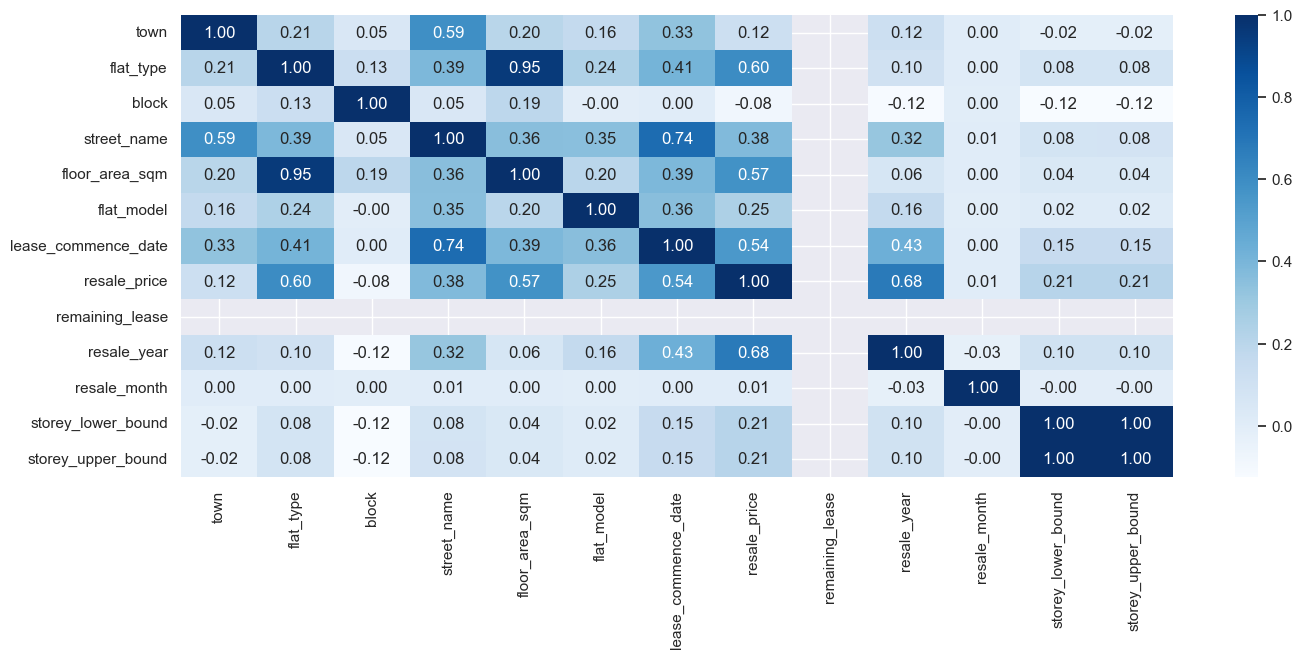

In [85]:
#Heatmap
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [86]:
#RIGHT TO MEACHIN LEARNING
#Split

In [87]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [88]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(740094, 12) (185024, 12) (740094,) (185024,)


In [89]:
#Scalling

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 1.06899815, -1.06912567, -0.50626449, ..., -1.33239404,
         -0.58030248, -0.58364403],
        [-1.62327163, -1.06912567, -0.64342978, ..., -0.16080231,
          0.0935755 ,  0.09036422],
        [-1.49506831, -1.06912567, -0.70058199, ...,  0.13209562,
          0.76745347,  0.76437248],
        ...,
        [ 1.45360812,  1.03966898, -0.19002228, ..., -0.16080231,
          1.44133145,  1.43838073],
        [ 0.29977821, -0.01472834, -0.76154434, ...,  0.42499356,
          1.44133145,  1.43838073],
        [-1.23866166, -0.01472834,  0.44627229, ...,  0.71789149,
         -0.58030248, -0.58364403]]),
 array([[ 1.45360812, -0.01472834,  0.85776818, ...,  1.59658529,
         -1.25418046, -1.25765229],
        [ 1.32540479,  2.09406631, -1.10826773, ..., -0.74659817,
         -0.58030248, -0.58364403],
        [ 0.68438818,  2.09406631,  2.45421981, ...,  1.01078942,
         -0.58030248, -0.58364403],
        ...,
        [ 0.68438818,  1.03966898, -0.14049036, ...,  

In [91]:
#Model_Fit
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
#Linear Regression
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[419634.45282851 562946.65024954 340367.69923677 ... 366254.30287695
 305936.24389754 269822.44284387]
787168    330000.0
713884    480000.0
52828     274500.0
558811    630000.0
430608    172500.0
            ...   
643897    535000.0
673054    533000.0
474184    265000.0
206919    330000.0
434132    235000.0
Name: resale_price, Length: 185024, dtype: float64


In [93]:
linear_model.score(X_test, y_test)

0.7921779683243135

In [94]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7915418303535474

In [95]:
#K Nearest Neighbor Regression
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28906.678858602132
Mean Squared Error (MSE)     : 1773214899.5621326
Root Mean Square Error (RMSE): 42109.55829217557
R-squared (R2) Score         : 0.9333027480979685


In [96]:
#Decision Tree Regression
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17414.70366951131
Mean Squared Error (MSE)     : 670757475.6533871
Root Mean Square Error (RMSE): 25898.98599662518
R-squared (R2) Score         : 0.9747702997928385


In [97]:
# Random Forest Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13925.996460759894
Mean Squared Error (MSE)     : 406540122.91286343
Root Mean Square Error (RMSE): 20162.840149960604
R-squared (R2) Score         : 0.9847085037505056


In [98]:
#Xg Boost Regression
# Create and train an XGBoost reg ressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16914.198959764308
Mean Squared Error (MSE)     : 558093768.3449934
Root Mean Square Error (RMSE): 23624.008303947772
R-squared (R2) Score         : 0.9790080036765697


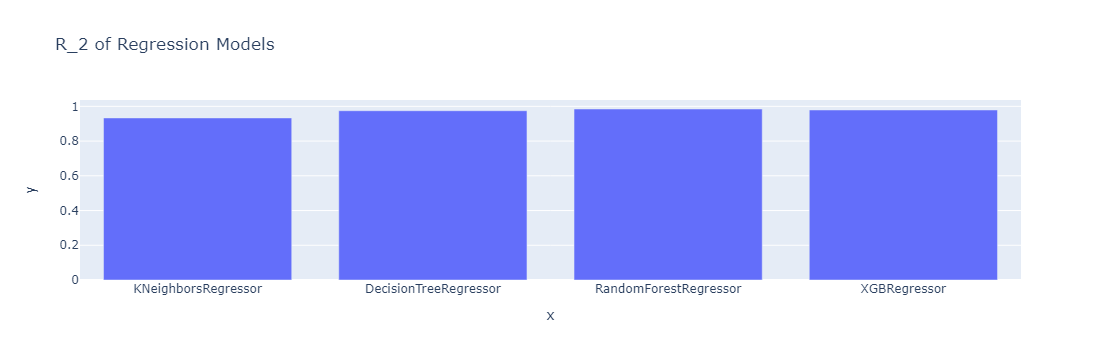

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9333027480979685
DecisionTreeRegressor 0.9747702997928385
RandomForestRegressor 0.9847085037505056
XGBRegressor 0.9790080036765697

Model: RandomForestRegressor contain Maximum R2_Score: 0.9847085037505056 


In [99]:
#Finalizeing Models
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

In [100]:
#Suggestion
rf_regressor.feature_importances_

array([0.04166435, 0.04977577, 0.01452959, 0.02362938, 0.28033028,
       0.00775175, 0.03358273, 0.        , 0.53112858, 0.00647532,
       0.0042443 , 0.00688796])

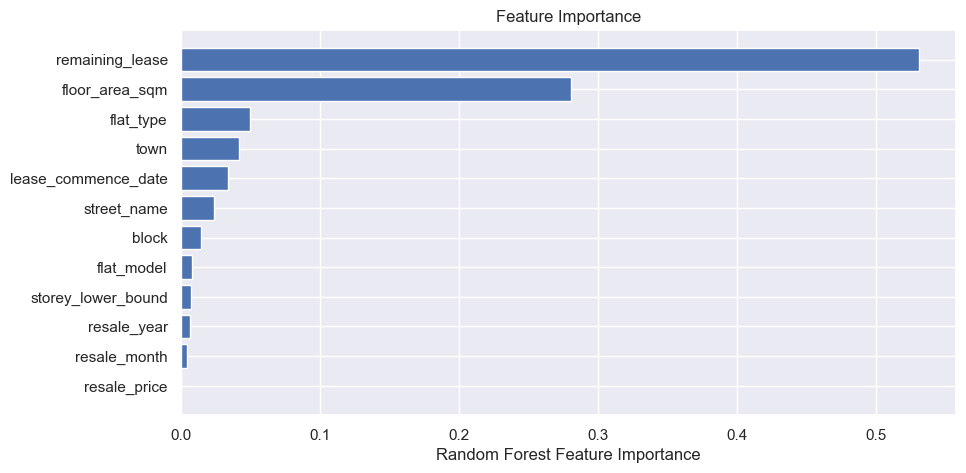

In [101]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

In [102]:
#Save the model
model=rf_regressor.fit(X_train, y_train)

In [103]:
model

RandomForestRegressor(random_state=42)

In [104]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


In [105]:
#Predicting
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df

town  flat_type  block  street_name  floor_area_sqm  flat_model  \
494962    19          3  808.0          189            73.0          16   
364229     8          4  642.0          439           100.0          24   
236273    11          3  671.0          274            74.0          16   
707963     4          4  313.0          248            93.0          15   
101206    13          4  904.0          309           103.0          16   

        lease_commence_date  resale_price  remaining_lease  resale_year  \
494962               1984.0      175000.0             68.0         2006   
364229               1998.0      252000.0             68.0         2002   
236273               1987.0      155500.0             68.0         1999   
707963               1986.0      360000.0             68.0         2014   
101206               1988.0      197000.0             68.0         1995   

        resale_month  storey_lower_bound  storey_upper_bound  
494962             5                   1                   3  
364229             2                   1                   3  
236273             2                  10                  12  
707963            12                   7                   9  
101206             9                   4                   6

In [106]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [107]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([176310., 258740., 155900., 371720., 196610.])